# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type groupby() count()

# dataframe for each type
type_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
type_drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
type_fares_count = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fares_count



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type.

driver_avg_fare = type_fares_count / type_drivers_count
driver_avg_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame(
    { "Total Rides": type_rides_count,
      "Total Drivers": type_drivers_count,
      "Total Fares": type_fares_count,
      "Average Fare per Ride": type_avg_fare,
      "Average Fare per Driver": driver_avg_fare})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 04:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 04:28,34.58,3.908450e+12,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

type_dates_count = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
type_dates_count

date              type    
2019-01-01 00:08  Urban       37.91
2019-01-01 00:46  Suburban    47.74
2019-01-01 02:07  Suburban    24.07
2019-01-01 03:46  Urban        7.57
2019-01-01 05:23  Urban       10.75
                              ...  
2019-05-08 04:20  Urban       21.99
2019-05-08 04:39  Urban       18.45
2019-05-08 07:29  Urban       18.55
2019-05-08 11:38  Urban       19.77
2019-05-08 13:10  Urban       18.04
Name: fare, Length: 2364, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_dates_count = type_dates_count.reset_index()

type_dates_count


,date,type,fare
0,2019-01-01 00:08,Urban,37.91
1,2019-01-01 00:46,Suburban,47.74
2,2019-01-01 02:07,Suburban,24.07
3,2019-01-01 03:46,Urban,7.57
4,2019-01-01 05:23,Urban,10.75
...,...,...,...
2359,2019-05-08 04:20,Urban,21.99
2360,2019-05-08 04:39,Urban,18.45
2361,2019-05-08 07:29,Urban,18.55
2362,2019-05-08 11:38,Urban,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_table = pd.pivot_table(type_dates_count, values='fare', index = 'date', columns ='type')

pyber_pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08,NaN,NaN,37.91
2019-01-01 00:46,NaN,47.74,NaN
2019-01-01 02:07,NaN,24.07,NaN
2019-01-01 03:46,NaN,NaN,7.57
2019-01-01 05:23,NaN,NaN,10.75
2019-01-01 09:45,43.69,NaN,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [22]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_pivottable_loc = pyber_pivot_table.loc['2019-01-01':'2019-04-28']

pyber_pivottable_loc.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08,NaN,NaN,37.91
2019-01-01 00:46,NaN,47.74,NaN
2019-01-01 02:07,NaN,24.07,NaN
2019-01-01 03:46,NaN,NaN,7.57
2019-01-01 05:23,NaN,NaN,10.75
2019-01-01 09:45,43.69,NaN,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [31]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pyber_pivottable_loc.index = pd.to_datetime(pyber_pivottable_loc.index)

In [33]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_pivottable_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2019-01-01 00:08:00 to 2019-04-27 23:52:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  564 non-null    float64
 2   Urban     1488 non-null   float64
dtypes: float64(3)
memory usage: 67.6 KB


In [35]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_pivottable_week = pyber_pivottable_loc.resample('W').sum()

pyber_pivottable_week.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


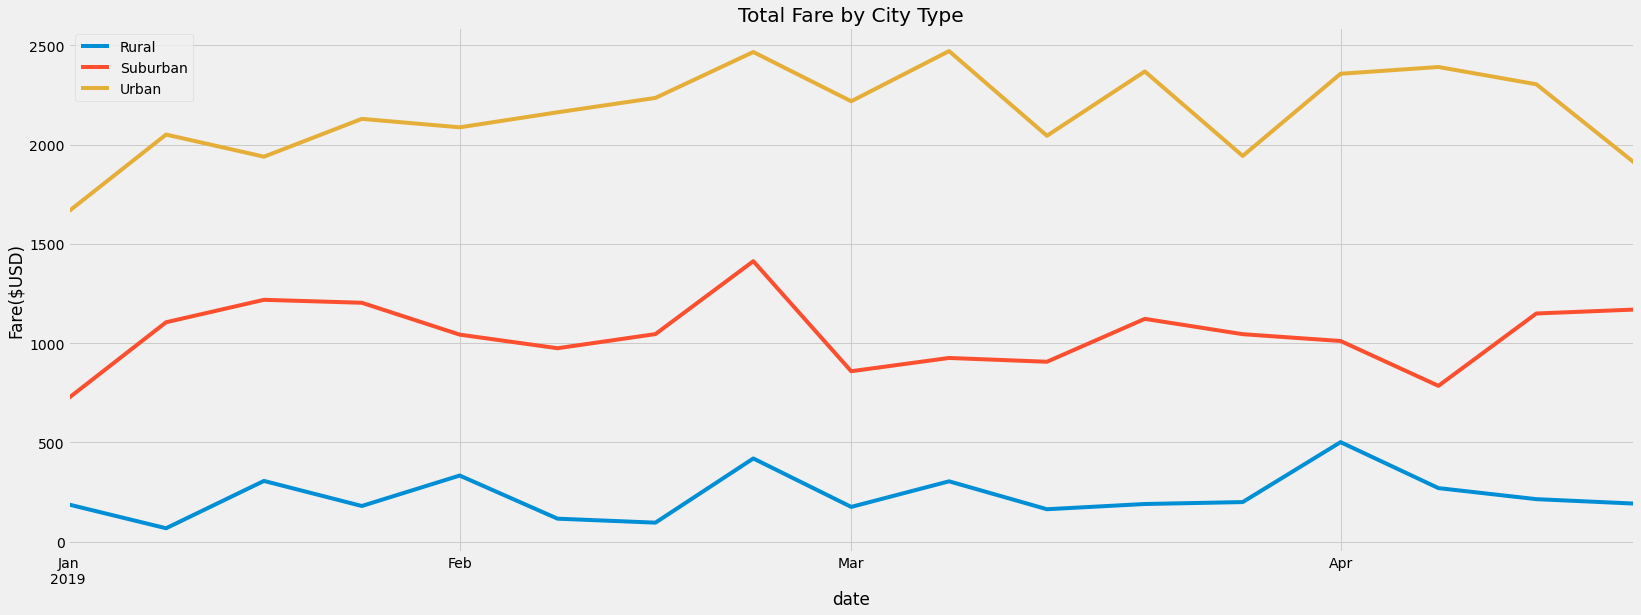

In [39]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_pivottable_week.plot(figsize=(25,9))
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")
plt.legend()
